In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# setup disply parameters
from matplotlib import pylab as plt
from matplotlib.ticker import StrMethodFormatter
float_formatter = StrMethodFormatter('{x:0.03f}')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(18, 6)) # set figure size
plt.rc("animation", html="html5")


In [2]:
import pandas as pd
import numpy as np
from time import sleep
from pprint import pprint

## Developing an agent for SCML2020

Let's see the simplest possible agent (a do-nothing agent)

In [4]:
from scml.scml2020 import SCML2020Agent, SCML2020World, BuyCheapSellExpensiveAgent

In [6]:
class MyDoNothing(SCML2020Agent):
    pass

Now, let's try to run a simulation with it

In [7]:
try:
    world = SCML2020World(
        **SCML2020World.generate(agent_types=[MyDoNothing], n_steps=20), 
        agent_name_reveals_type=False, 
        construct_graphs=True,
    )
except TypeError as e:
    print(e)

Can't instantiate abstract class MyDoNothing with abstract methods init, on_agent_bankrupt, on_contract_breached, on_contract_executed, on_failures, on_negotiation_failure, on_negotiation_success, respond_to_negotiation_request, step


We failed - as expected - because we did not implement the abstract methods that must be implemented. For a detailed explanation of the role of each one of these methods, please refer to [SCML2020 description](http://www.yasserm.com/scml/scml2020.pdf). Here we will only give a brief expanation of the most important ones while working through our agent.

Let's start by building a working do-nothing agent

### Do Nothing Agent

In [8]:
class MyDoNothing(SCML2020Agent):
    """An agent that does nothing for the whole length of the simulation"""

    def respond_to_negotiation_request(self, initiator, issues, annotation, mechanism):
        """Refuse to negotiation with anyone"""

    def sign_all_contracts(self, contracts):
        """Refuse to sign any contracts"""
        return [None] * len(contracts)

    def step(self):
        """Do nothing every time-step"""

    def init(self):
        """Who needs initialization"""

    def on_agent_bankrupt(self, agent, contracts, quantities, compensation_money):
        """Who cares if others are bankrupt"""

    def on_failures(self, failures):
        """We never schedule production anyway"""

    def on_negotiation_failure(self, partners, annotation, mechanism, state):
        """We did not even negotiate!!"""

    def on_negotiation_success(self, contract, mechanism):
        """We did not even negotiate!!"""

    def on_contract_cancelled(self, contract, rejectors):
        """We did not even negotiate"""

    def on_contracts_finalized(self, signed, cancelled, rejectors):
        """Do not do anything when contracts are finalized (you will not have any anyway)"""

    def on_contract_executed(self, contract):
        """We did not sign any"""

    def on_contract_breached(self, contract, breaches, resolution):
        """Who cares, we do not have any contracts anyway"""


Let's test this agent to confirm that it is really doing nothing

In [17]:
world = SCML2020World(
    **SCML2020World.generate([BuyCheapSellExpensiveAgent, MyDoNothing], n_steps=10), 
    construct_graphs=True,
)
world.run()

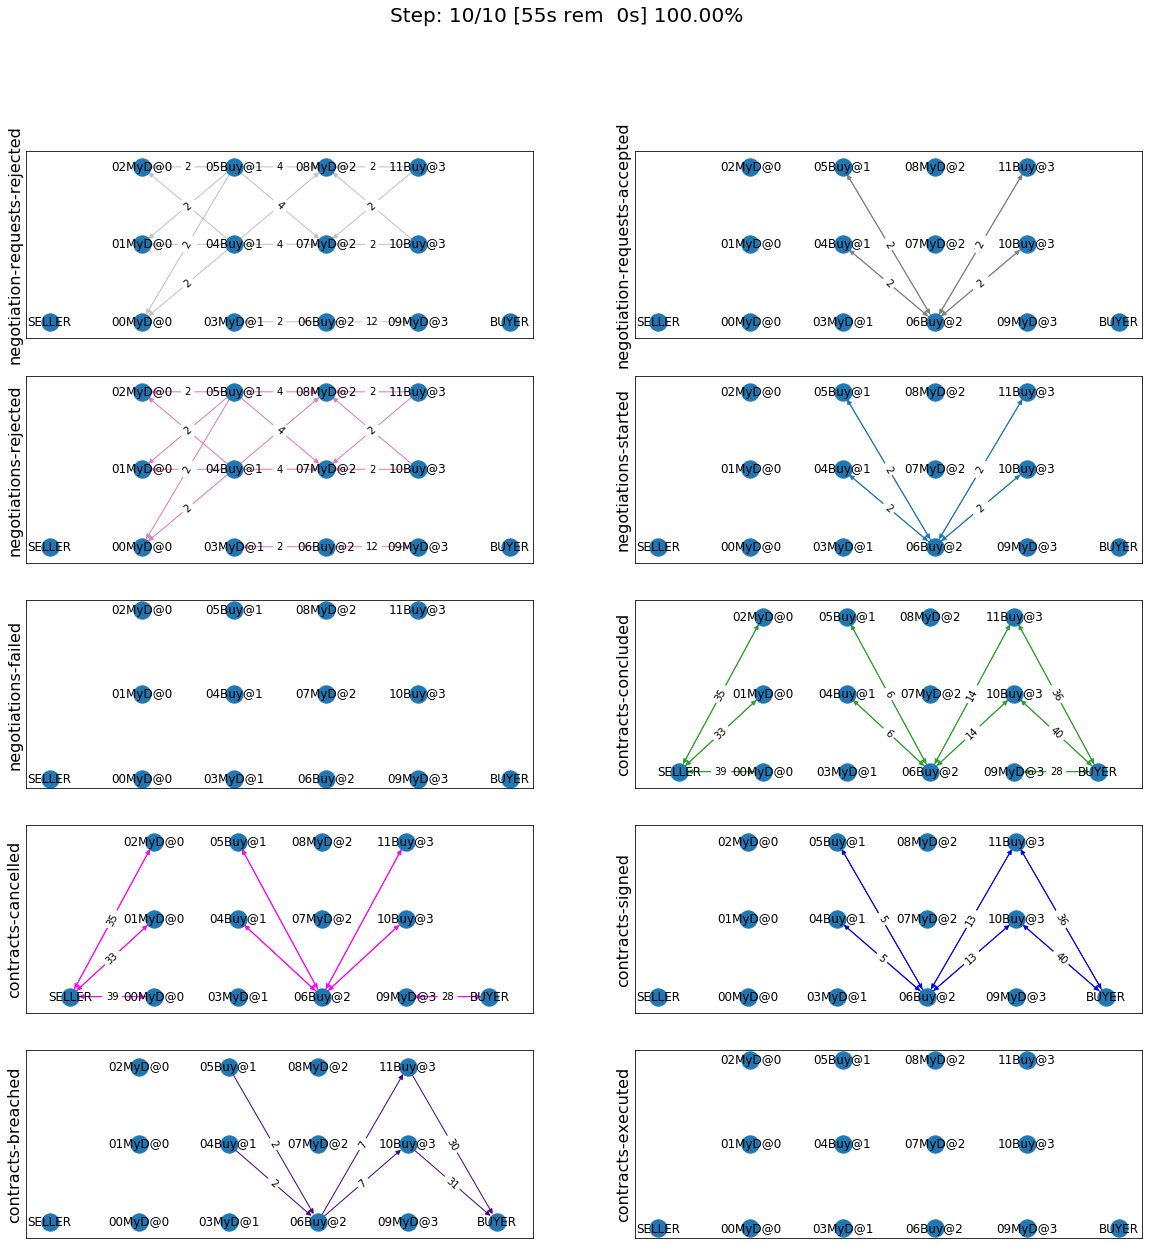

In [19]:
world.draw(steps=(0, world.n_steps), together=False, ncols=2, figsize=(20, 20))
plt.show()